# Support Vector Machine

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
def calculate_accuracy(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    print('Train accuracy:', '{:.3f}'.format(accuracy_train), 'Test accuracy:', '{:.3f}'.format(accuracy_test))
    return accuracy_train, accuracy_test, classifier

In [4]:
df = pd.read_csv("colon_cancer.csv",sep=";",index_col="id_sample")
df

,ADH1C,DHRS11,UGP2,SLC7A5,CTSS,DAO,NIBAN1,PRUNE2,FOXF2,TENT5C,...,BSPRY,CDHR2,ERRFI1,CLIC5,PLLP,GAL,CRYL1,YBX2,ANGPTL4,tissue_status
id_sample,,,,,,,,,,,,,,,,,,,,,
EPSM-COLON-0001,9.199944,6.090054,7.062512,3.864253,7.869368,8.465133,1.174665,0.975086,3.028995,6.350919,...,5.528371,3.500730,2.893760,5.130743,1.485110,1.830484,6.379933,3.919293,3.031413,normal
EPSM-COLON-0002,7.767618,6.027985,6.318818,3.069581,6.410334,8.159814,5.959414,1.625518,2.984629,4.686086,...,5.671788,4.658790,4.715374,5.438104,2.131466,2.097157,6.863173,0.322829,3.978531,normal
EPSM-COLON-0003,7.918904,5.885948,6.917742,3.188257,7.915549,8.004194,1.560386,2.379909,2.929762,4.281126,...,4.596079,5.649376,4.047899,6.580938,1.447209,3.890943,6.209704,3.274407,3.714491,normal
EPSM-COLON-0004,9.053553,6.027985,7.081085,2.357523,5.657726,8.004194,3.548988,3.260031,3.313829,4.821072,...,4.135061,5.437107,4.537381,4.615263,1.004454,1.840902,6.774063,3.320525,3.080796,normal
EPSM-COLON-0005,6.027822,5.791257,5.937685,4.137667,5.818999,8.056067,3.307945,5.208874,4.191695,5.181036,...,3.674043,6.286182,4.715374,4.432410,0.159195,3.506561,6.150297,0.461184,5.140305,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPSM-COLON-0800,6.019963,3.089364,4.393486,5.947781,7.124598,6.476207,3.511464,3.360521,2.954865,1.708999,...,4.643061,4.632634,4.670141,4.571678,2.864645,2.336317,6.923562,2.710594,2.507989,tumoral
EPSM-COLON-0801,3.691606,2.118165,4.794787,4.746829,5.493405,5.127365,3.516129,1.701237,2.771962,2.215480,...,4.695878,1.800088,7.647285,1.340236,3.063140,3.410137,3.856952,1.491817,6.493643,tumoral
EPSM-COLON-0802,3.035242,2.495383,4.438451,5.916828,7.155135,5.556266,1.192243,1.169104,1.038835,2.833854,...,4.886197,3.624820,3.912746,2.806374,3.170815,0.775487,4.952383,1.960087,2.809510,tumoral


In [5]:
random_state = 42

In [6]:
X = df.drop(columns=["tissue_status"])
Y = df["tissue_status"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = random_state, stratify = Y)
print("Train : ", X_train.shape,"Test : ", X_test.shape)

Train :  (603, 60) Test :  (201, 60)


## Normalisation des données

> Pour faciliter la convergence des algorithmes de machine learning, il est fortement conseillé de normaliser les données. Une approche standard est la normalisation centrées-réduite.     

>**Attention !** Le calcul de la moyenne $\mu$ et l'écart type $\sigma$ doit être réalisé **uniquement sur le dataset d'entrainement**. Le dataset de test  doit  être normalisé en utilisant les valeurs $\mu$ et $\sigma$ calculées sur le dataset d'entrainement.

>La librairie **scikit-Learn** contient un certain nombre de *scalers* qui permettent de réaliser facilement cette normalisation. Ainsi le scaler `StandardScaler`permet de centrer-réduire les données.

In [14]:
from sklearn.preprocessing import StandardScaler

# Création d'un scaler
scaler = StandardScaler()

# Calcul de mu et sigma sur X_train
scaler.fit(X_train)

# Affichage des résultats moyenne et écart type de chaque variable
print("mean => mu : ",scaler.mean_,) 
print("Std sigma : ", scaler.scale_)

mean => mu :  [5.56250784 4.37031229 5.5576452  4.5032885  6.70477296 7.20224541
 2.73722189 2.83883913 3.09567408 3.62783178 4.9956429  8.00645284
 2.13428824 3.25051517 5.72798593 2.602014   5.09621073 4.95027125
 5.12856168 2.60945896 4.57087133 2.61901627 4.00316847 2.83774532
 5.05378073 4.70302486 4.48579809 5.2552879  5.10330709 3.87416991
 4.42493323 3.41604512 2.99677417 3.12825274 3.21237453 2.94096313
 4.059025   2.56226458 4.03283796 2.46987601 3.61611895 3.06480367
 4.18373897 3.33961906 4.60751801 3.22049712 4.79100352 3.19601853
 2.16639761 5.46168857 3.59541576 4.6518569  4.25604076 4.60405964
 4.10572903 1.79212905 2.84821267 6.10344378 2.81507307 2.61131882]
Std sigma :  [2.87450773 1.41750502 1.16900926 1.62727559 1.08192036 1.39528512
 1.4405307  1.25002277 1.20996386 1.2651503  0.7258847  3.02651441
 0.6970907  0.8496204  1.10564825 1.29408208 1.25535892 2.70235274
 0.83604128 1.45557859 1.36504482 0.89653108 0.89616633 0.74177497
 0.76354578 1.08303667 0.89196864 

> Appliquer les valeurs $\mu$ et $\sigma$ calculées pour X_train aux deux dataset, pour cela il faut utiliser la méthode `transform` du scaler

In [19]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

#### Vérification
>les valeurs sont centrées et réduites

In [22]:
print("moy", X_train_scaled.mean().head() , "std",X_train_scaled.std().head())

moy ADH1C     6.812314e-17
DHRS11   -1.697555e-16
UGP2     -7.202641e-16
SLC7A5   -1.417698e-16
CTSS      5.910142e-17
dtype: float64 std ADH1C     1.00083
DHRS11    1.00083
UGP2      1.00083
SLC7A5    1.00083
CTSS      1.00083
dtype: float64


## Modèle de régression logistique
>La **régression logistique** utilise une fonction analytique, appelée fonction **logistique** ou fonction **sigmoïde**, qui a une forme caractéristique en S. En optimisant les coéfficiant de cette courbe (max de vraisemblance ou min de cross-entropie), elle permet d'estimer la probabilité pour un échantillon d'appartenir à telle ou telle classe. Par exemple, *tumoral* versus *normal*.

<img src="logistic_regression.png" alt="Logistic regression" width="600" aling="center">

In [89]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = random_state, penalty='none')
accuracy_train , accuracy_test , trained_classifier = calculate_accuracy(classifier,X_train_scaled,
                                                                         X_test_scaled, y_train, y_test)

Train accuracy: 1.000 Test accuracy: 1.000


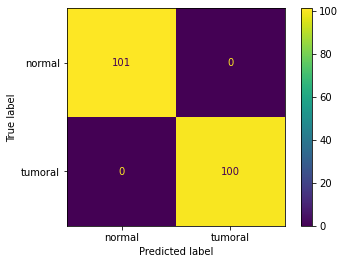

In [90]:
metrics.plot_confusion_matrix(trained_classifier,X_test_scaled ,y_test)

## Impact de chaque gène dans le modèle Logarithme

> Après la phase d'entrainement, il est possible de connaître les paramètres $\beta$ du modèle obtenu. Ils sont disponibles dans l'attribut `coef_`.       
Plus le coéfficient $\beta$ est grand en valeur absolue, plus l'impact du gène correspondant est important dans le modèle.

**Afficher les coefficients $\beta$ pour quelques gènes**

In [26]:
coefficients = pd.DataFrame(trained_classifier.coef_[0], index = X_train_scaled.columns, columns = ['beta'])
coefficients.head()

,beta
ADH1C,-1.240915
DHRS11,-1.319721
UGP2,-2.119381
SLC7A5,4.426813
CTSS,-0.049513


**Afficher les coefficient $\beta$ sous forme de *barplot*, du plus petit au plus grand.**

<AxesSubplot:>

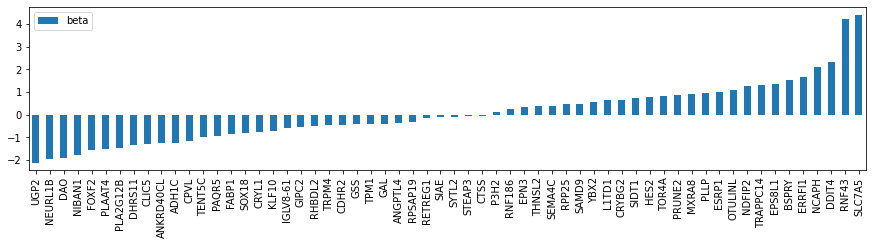

In [27]:
coefficients = coefficients.sort_values(by='beta')
coefficients.plot.bar(figsize=(15,3))

Deux gène impact fortement le modèle:
- SLC7A
- RNF43

## Analyse de la corrélation entre les meilleurs prédicteurs  du modèle

**Identifions N meilleurs gènes qui impactent le plus fortement le modèle**

In [33]:
n_features = 3
coefficients['abs_beta'] = coefficients['beta'].abs()
coefficients = coefficients.sort_values(by='abs_beta', ascending = False)
top_features = list(coefficients.head(n_features).index)

print('Top features LR:', top_features)

Top features LR: ['SLC7A5', 'RNF43', 'DDIT4']


**Affichage d'un paiplot pour mesureer visuellement la corélation entre ces gènes**

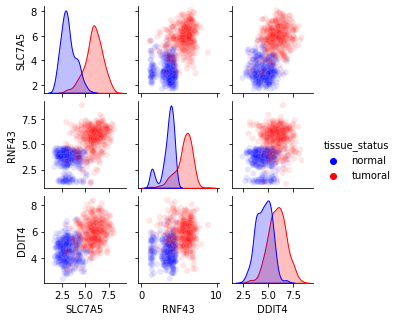

In [74]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

top_features.append('tissue_status')

pal = dict(normal="b", tumoral="red") 
sns.pairplot(df.loc[:,top_features ], hue='tissue_status',palette=pal, height=1.5,  plot_kws={'alpha':0.1})

## Performances du modèle logarithmique N_top_features

In [78]:
top_features.pop(3)

'tissue_status'

In [79]:
for i in range (len(top_features)):
    selected_features = top_features[0:i+1]
    print(selected_features)
    accuracy_train, accuracy_test, trained_classifier = calculate_accuracy( classifier, X_train_scaled[selected_features],
                                                                          X_test_scaled[selected_features], y_train,y_test)

['SLC7A5']
Train accuracy: 0.929 Test accuracy: 0.920
['SLC7A5', 'RNF43']
Train accuracy: 0.964 Test accuracy: 0.935
['SLC7A5', 'RNF43', 'DDIT4']
Train accuracy: 0.970 Test accuracy: 0.955


## Modèle linéaire de Support Vector Machine (SVM)

> Un modèle SVM cherche àdéfinir une frontière entre deux ou plusieurs classes d'échantillons, en maximisant la marge entre cette frontière et les échantillons les plus proches (vecteurs de support)

<img src="svm.png" alt="Support Vector Machine" width="600" aling="center">

**Utilisation des données normalisées pour la création du modèle SVM**

Train accuracy: 1.000 Test accuracy: 1.000


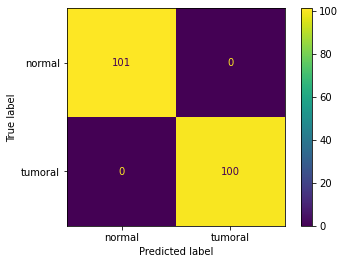

In [81]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(random_state = random_state)

accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train_scaled, 
                                                                       X_test_scaled, y_train, y_test)
                                                                      

metrics.plot_confusion_matrix(trained_classifier, X_test_scaled, y_test)

## Impact de chaque gène dans le modèle SVM

<AxesSubplot:>

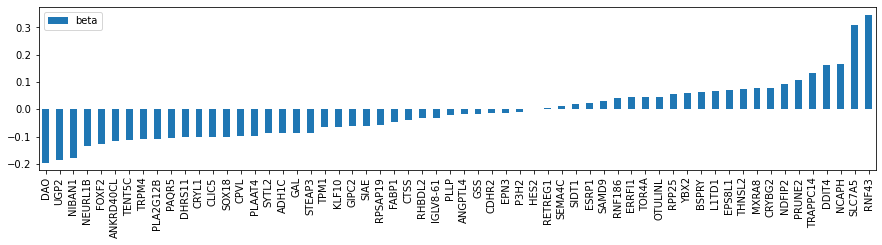

In [82]:
coeff_SVM = pd.DataFrame(trained_classifier.coef_[0], index = X_train_scaled.columns, columns = ['beta'])

coeff_SVM = coeff_SVM.sort_values(by='beta')
coeff_SVM.plot.bar(figsize = (15,3))

In [83]:
coeff_SVM['abs_beta'] = coeff_SVM['beta'].abs()
coeff_SVM = coeff_SVM.sort_values(by='abs_beta', ascending = False)
top_features = list(coeff_SVM.head(n_features).index)
print('Top features SVM :',top_features)

Top features SVM : ['RNF43', 'SLC7A5', 'DAO']


## Etude de cas

> L'hôpital AIL a mis au point un nouvel outil de diagnostique basé sur les niveaux d'expression d'un panel de 3 gèness. Cet outil a donné les mesures suivantes pour un nouveau patient à l'hôpital:      
new_patient = {'RNF43':4.68, 'SLCA5':4.10 , 'DAO':7.59}

In [86]:
new_patient = {'RNF43':4.68, 'SLCA5':4.10 , 'DAO':7.59}

In [87]:
X_predict = pd.DataFrame([new_patient], index = ['new_patient'])

In [88]:
X_predict

,RNF43,SLCA5,DAO
new_patient,4.68,4.1,7.59


#### Ref : Standardisation
https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

